In [11]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
from nnfs.datasets import vertical_data

# Initialize nnfs (sets random seed & dtype)
nnfs.init()

# -----------------------------
# Dense Layer
# -----------------------------
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


# -----------------------------
# ReLU Activation
# -----------------------------
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


# -----------------------------
# Softmax Activation
# -----------------------------
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities


# -----------------------------
# Loss Base Class
# -----------------------------
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        return np.mean(sample_losses)


# -----------------------------
# Categorical Cross-Entropy Loss
# -----------------------------
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):

        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                np.arange(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# -----------------------------
# Dataset
# -----------------------------
# X, y = spiral_data(samples=100, classes=3)

X, y = vertical_data(samples=100, classes=3)
# -----------------------------
# Model
# -----------------------------
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

# -----------------------------
# Optimization (Random Search)
# -----------------------------
lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):

    # Random weight updates
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)

    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss & accuracy
    loss = loss_function.calculate(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # Check improvement
    if loss < lowest_loss:
        print(
            'New set of weights found, iteration:', iteration,
            'loss:', loss,
            'acc:', accuracy
        )

        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.0987684 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987465 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0976487 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0972018 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0938749 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0935849 acc: 0.6666666666666666
New set of weights found, iteration: 20 loss: 1.0908297 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0905013 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0879314 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.0856307 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0801181 acc: 0.35
New set of weights found, iteration: 29 loss: 1.0725244 acc: 0.5266666666666666
New set of weights found, iteration: 30 loss: 1.0724432 ac

In [12]:
loss_history = []
accuracy_history = []
iteration_history = []

In [18]:
if loss < lowest_loss:
    loss_history.append(loss)
    accuracy_history.append(accuracy)
    iteration_history.append(iteration)

In [20]:
if loss < lowest_loss:
    print(
        'New set of weights found, iteration:', iteration,
        'loss:', loss,
        'acc:', accuracy
    )

    loss_history.append(loss)
    accuracy_history.append(accuracy)
    iteration_history.append(iteration)

    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

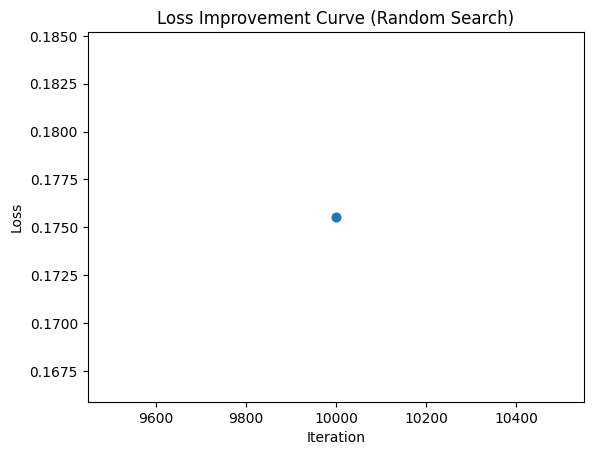

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(iteration_history, loss_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Improvement Curve (Random Search)")
plt.show()

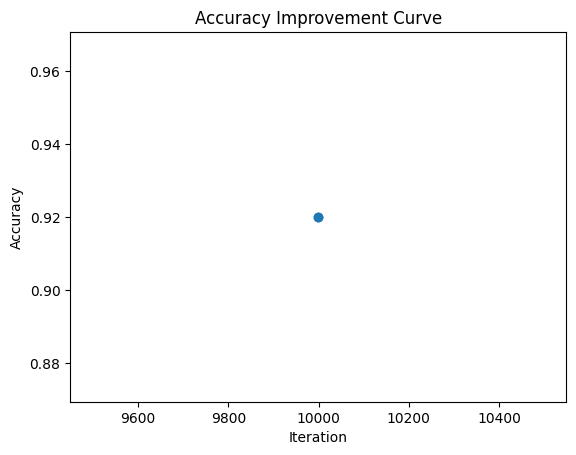

In [23]:
plt.figure()
plt.plot(iteration_history, accuracy_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy Improvement Curve")
plt.show()

In [15]:
def visualize_decision_boundary(model_layers, X, y):

    dense1, activation1, dense2, activation2 = model_layers

    # Create a grid
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass
    dense1.forward(grid)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    predictions = np.argmax(activation2.output, axis=1)
    predictions = predictions.reshape(xx.shape)

    # Plot
    plt.figure()
    plt.contourf(xx, yy, predictions, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()


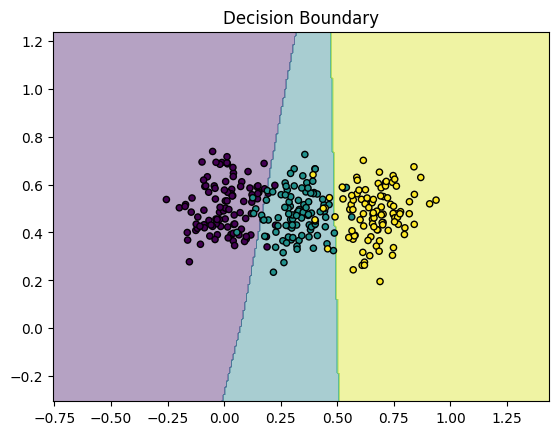

In [16]:
visualize_decision_boundary(
    (dense1, activation1, dense2, activation2),
    X, y
)

In [24]:
print(len(loss_history))
print(loss_history[:5])

2
[np.float32(0.17554088), np.float32(0.17554088)]
